In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', header=None)
#data = pd.read_csv('spambase.data')

In [3]:
data.fillna(0)
x=data.iloc[:, 0:57]
y=data.iloc[:, 57]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9543973941368078


This is an imbalanced dataset. Hence, accuracy is not a good metric to evaluate the performance of the model. We use AUC (Area Under The Curve) as a performance measure. It is one of the most important evaluation metrics for checking any classification model's performance. ROC (Receiver Operat- ing Characteristics) curve measures classification accuracy at various thresholds settings. AUC measures the total area under the ROC curve. Higher the AUC, better the model is at distinguishing the two classes.

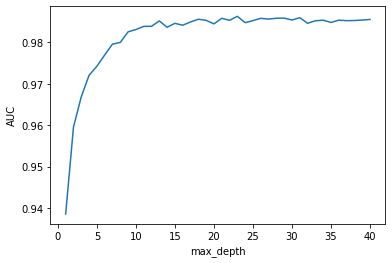

In [14]:
auc_values=[]
for i in range(1,41):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf = clf.fit(x_train,y_train)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    auc_values.append(auc)
    
plt.figure
plt.plot(np.arange(1, 41), auc_values)
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.show()

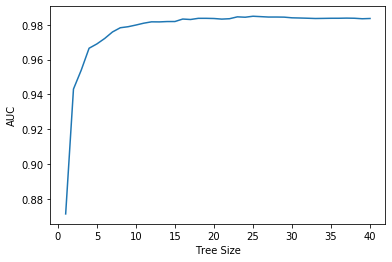

In [15]:
auc_values=[]
for i in range(1,41):
    clf = RandomForestClassifier(n_estimators=i, max_depth=25, random_state=0)
    clf = clf.fit(x_train,y_train)
    y_pred_proba = clf.predict_proba(x_test)[::,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    auc_values.append(auc)
    
plt.figure
plt.plot(np.arange(1, 41), auc_values)
plt.xlabel('Tree Size')
plt.ylabel('AUC')
plt.show()